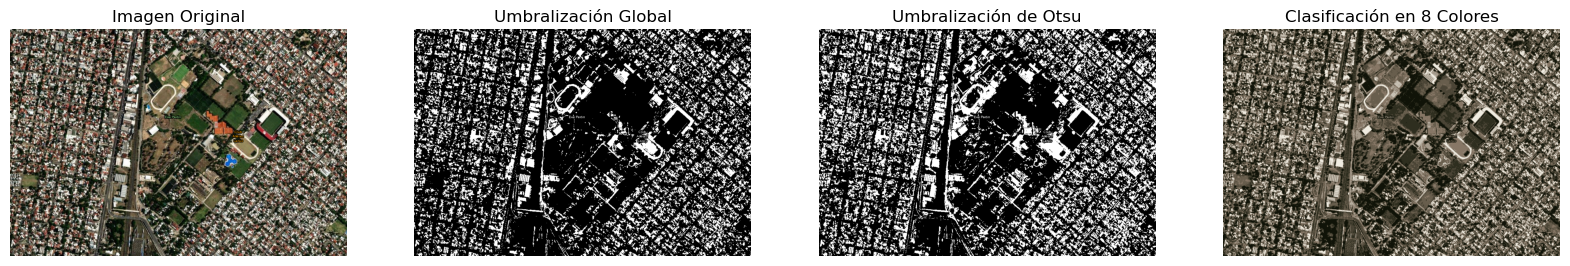

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color
img_color = cv2.imread('lanus.png')
# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# a) Umbralización Global
_, thresh_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# b) Método de Umbralización de Otsu
_, thresh_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# c) Clasificación en 8 colores (usando umbralización banda por banda en RGB)
def classify_colors(img, n_colors=8):
    # Convertir la imagen a tipo float32 para usar k-means
    img_float = np.float32(img_color.reshape(-1, 3))

    # Criterios para el algoritmo de k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    # Aplicar k-means
    _, labels, centers = cv2.kmeans(img_float, n_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    classified_img = centers[labels.flatten()].reshape(img_color.shape)

    return classified_img

classified_img = classify_colors(img_color)

# Mostrar los resultados
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(thresh_global, cmap='gray')
axes[1].set_title('Umbralización Global')
axes[1].axis('off')

axes[2].imshow(thresh_otsu, cmap='gray')
axes[2].set_title('Umbralización de Otsu')
axes[2].axis('off')

axes[3].imshow(cv2.cvtColor(classified_img, cv2.COLOR_BGR2RGB))
axes[3].set_title('Clasificación en 8 Colores')
axes[3].axis('off')

plt.show()
